In [41]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np

In [42]:
tf.__version__

'1.12.0'

In [43]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [44]:
datasetPath = './mnistasjpg/trainingSet'

trainingGenerator = imageGenerator.flow_from_directory(
    datasetPath,
    subset='training',
    color_mode='grayscale',
)

validationGenerator = imageGenerator.flow_from_directory(
    datasetPath,
    subset='validation',
    color_mode='grayscale',
)

Found 37804 images belonging to 10 classes.
Found 4196 images belonging to 10 classes.


In [45]:
data = trainingGenerator.next()

In [46]:
# data is (datasets, labels)
print('datasets shape is {}'.format(data[0].shape))
print('labels shape is {}'.format(data[1].shape))

datasets shape is (32, 256, 256, 1)
labels shape is (32, 10)


In [47]:
np.max(data[0][0]) # 정규화 0~1의 값으로 전부 바꿔야함. 

1.0

In [48]:
data[0][0].shape

(256, 256, 1)

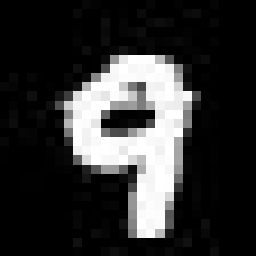

In [49]:
array_to_img(data[0][7])

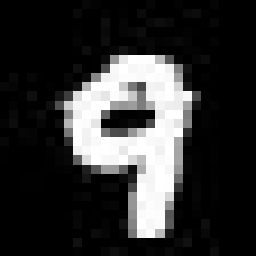

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
index = 7
display(array_to_img(data[0][index]))
print(data[1][index])

In [51]:
model = tf.keras.Sequential()

In [68]:
#1차원으로 펴주는.. Flatten()
#model.add(layers.Input)
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(256, 256, 1)))
model.add(layers.Flatten())

#추가
model.add(layers.Dense(256, activation='relu')) # 퍼셉트론과 마찬가지라고?? 
#끝
model.add(layers.Dense(10, activation='softmax')) # 퍼셉트론과 마찬가지라고?? 




In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16777472  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 16,780,042
Trainable params: 16,780,042
Non-trainable params: 0
_________________________________________________________________


In [70]:
# 학습하기 전 complie 하이퍼파라미터???를 세팅 
model.compile(
    'SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit_generator(
    trainingGenerator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validationGenerator,
    validation_steps=30,
)

Epoch 1/10
100/100 [==============================] - 17s 170ms/step - loss: 0.6908 - acc: 0.7916 - val_loss: 0.3883 - val_acc: 0.8760
Epoch 2/10
100/100 [==============================] - 16s 163ms/step - loss: 0.3632 - acc: 0.8934 - val_loss: 0.2944 - val_acc: 0.9094
Epoch 3/10
100/100 [==============================] - 16s 163ms/step - loss: 0.2890 - acc: 0.9122 - val_loss: 0.2560 - val_acc: 0.9146
Epoch 4/10
100/100 [==============================] - 17s 168ms/step - loss: 0.2403 - acc: 0.9309 - val_loss: 0.2422 - val_acc: 0.9271
Epoch 5/10
100/100 [==============================] - 16s 164ms/step - loss: 0.2414 - acc: 0.9269 - val_loss: 0.2527 - val_acc: 0.9135
Epoch 6/10
100/100 [==============================] - 16s 164ms/step - loss: 0.2011 - acc: 0.9400 - val_loss: 0.2078 - val_acc: 0.9427
Epoch 7/10
100/100 [==============================] - 17s 166ms/step - loss: 0.1850 - acc: 0.9456 - val_loss: 0.1873 - val_acc: 0.9448
Epoch 8/10
100/100 [==============================] - 1

In [78]:
model.evaluate_generator(validationGenerator)

[0.16422799415620057, 0.9504289799809342]

In [79]:
data = validationGenerator.next()
result = model.predict_classes(
    data[0]
)

print('{}'.format(result))

[5 1 0 8 3 7 0 8 5 0 4 5 2 4 3 8 0 7 2 1 7 2 6 0 6 5 1 0 6 7 5 5]


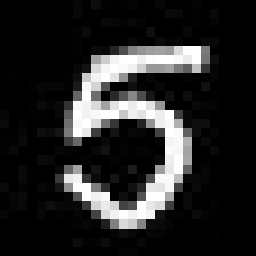

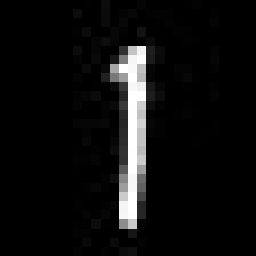

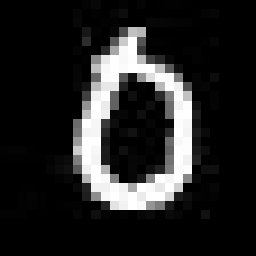

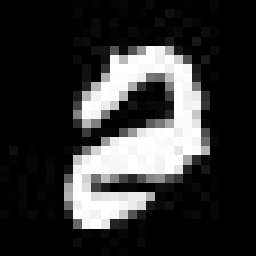

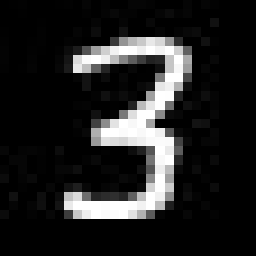

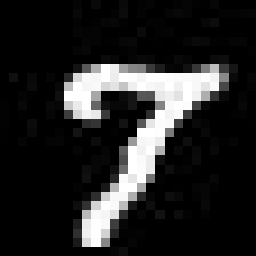

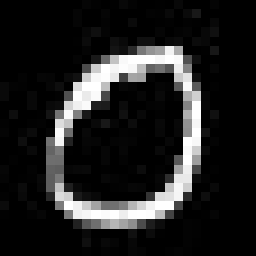

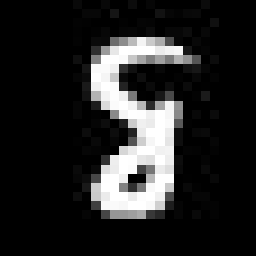

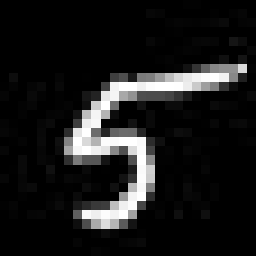

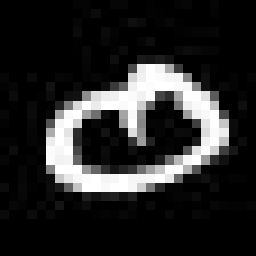

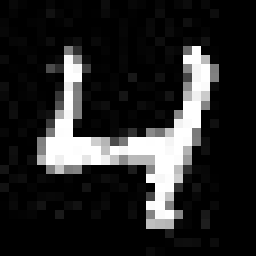

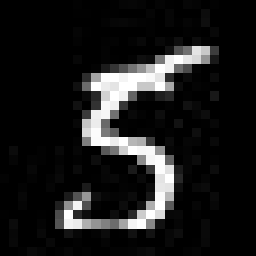

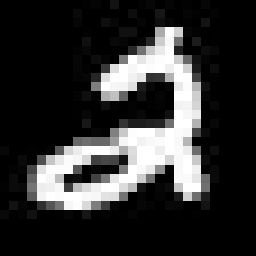

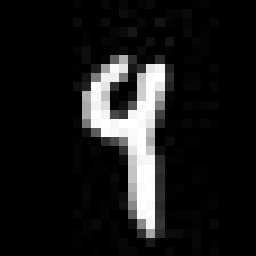

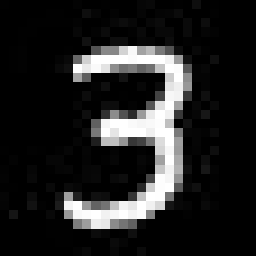

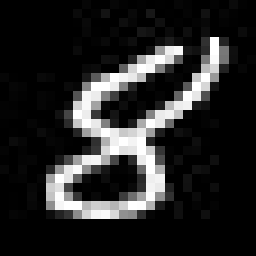

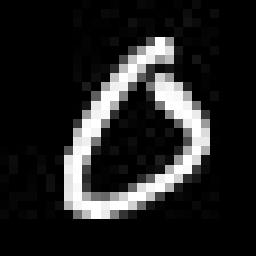

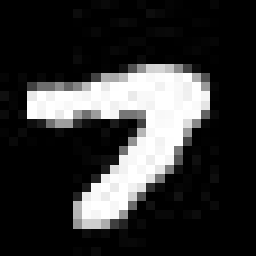

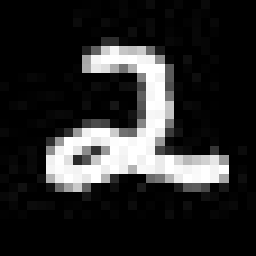

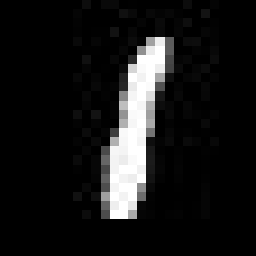

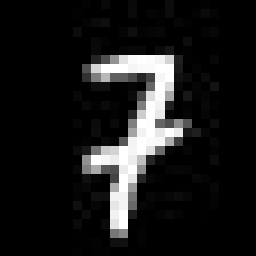

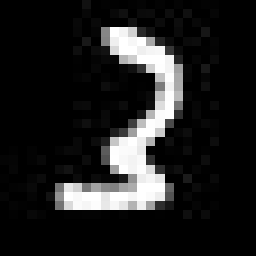

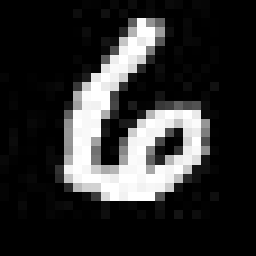

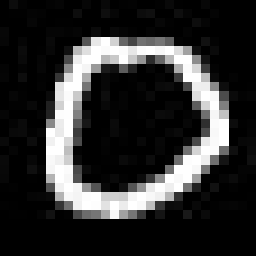

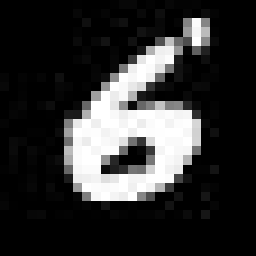

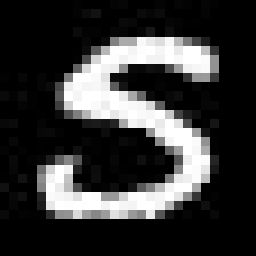

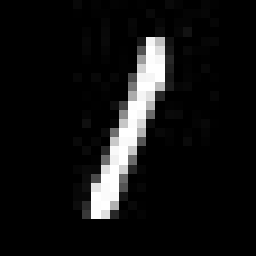

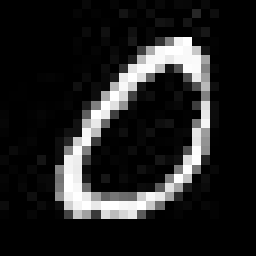

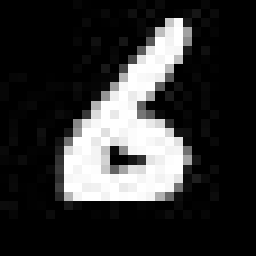

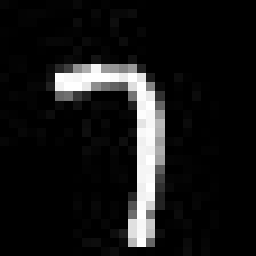

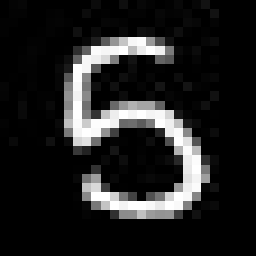

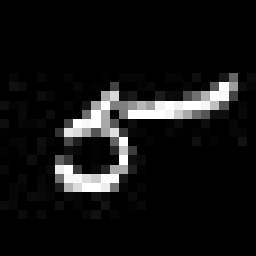

In [80]:
for num in data[0]:
    display(array_to_img(num))

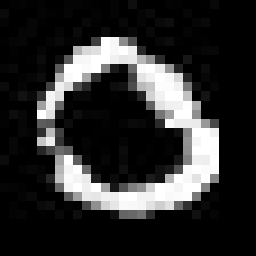

predict is 3, label is 0


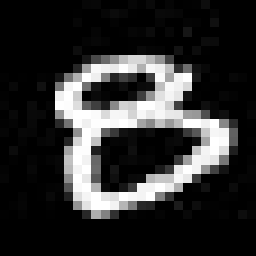

predict is 0, label is 8


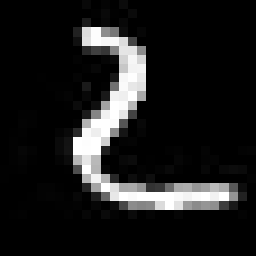

predict is 6, label is 2


In [81]:
data = validationGenerator.next()
results = model.predict(
    data[0]
)

for index, result in enumerate(results):
    predictVal = np.argmax(result) #모델이 예측한 값
    labelVal = np.argmax(data[1][index]) #실제 정답
    if predictVal != labelVal:
        display(array_to_img(data[0][index]))
        print('predict is {}, label is {}'.format(predictVal, labelVal))